In [12]:
# files/modules
from env import host, user, password
import acquire as a
import prepare as p

# manipulations
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, f_oneway

## Acquire
'Basic' columns and then all of the columns for Zillow data (that meets parameters)

In [ ]:
zillow.info()

In [ ]:
zillow_l = a.larger_acquire_zillow()

In [ ]:
zillow_l.info()

## Preparation/Splitting


In [ ]:
# looking at null counts
zillow.isnull().sum()

In [ ]:
zillow_l.isnull().sum()

In [ ]:
# The nulls for aircondition and architecture are so large, going to drop columns entirely. Also dropping 
# landtaxvaluedollarcnt, structuretaxvaluedollarcnt, and taxamount for target variable (taxvaluedollarcnt) integrity.

In [ ]:
zillow_l = zillow_l.drop(columns= ['airconditioningtypeid', 'architecturalstyletypeid', 'landtaxvaluedollarcnt',
                                  'structuretaxvaluedollarcnt', 'taxamount'])

In [ ]:
nulls_tax = zillow[zillow.tax_value.isna()]

In [ ]:
nulls_area = zillow[zillow.area.isna()]

In [ ]:
nulls_area.value_counts(dropna=False)

In [ ]:
nulls_area.head(30)

In [ ]:
zillow = zillow.dropna()

In [ ]:
zillow.info()

In [ ]:
# The nulls were largely from 0s in multiple columns, so dropped all nulls. Did not consider
# worth imputing the data. Was also a very small portion of the total dataset.

In [ ]:
zillow.isnull().sum()

In [ ]:
zillow.bedrooms.value_counts()

In [ ]:
zillow.bathrooms.value_counts()

In [ ]:
zillow[zillow.area == 0]

In [ ]:
zillow[zillow.tax_value == 0]

In [ ]:
# Some visualizations of columns

In [ ]:
cols = [col for col in zillow.columns]
plt.figure(figsize=(16,6))
for i, col in enumerate(cols):
    plot_number = i + 1
    plt.subplot(1, len(cols), plot_number)
    plt.title(col)
    zillow[col].hist(bins=5)
    plt.grid(False)
    plt.ticklabel_format(useOffset=False)
    
plt.show()

In [ ]:
zillow.tax_value.head()

In [ ]:
zillow_l.isnull().sum()

In [ ]:
for col in cols:
    print(zillow_l[col].isna().sum() >= (.25 * zillow_l[col].count()))

In [ ]:
for col in zillow_l:
    if zillow_l[col].isna().sum() >= (.25 * len(zillow_l)):
        zillow_l = zillow_l.drop(columns = col)

In [ ]:
zillow_l.info()

In [ ]:
zillow.info()

In [ ]:
zillow_l = zillow_l.drop(columns = 'id')

In [ ]:
zillow_l.info()

In [ ]:
zillow_l.isnull().sum()

In [ ]:
# The amount of NaN values is a small % of total rows, or redundant in nature (regionidcity). Will drop all NaNs
zillow_l = zillow_l.dropna()

In [ ]:
zillow_l.isnull().sum()

In [ ]:
zillow_l.info()

In [ ]:
zillow_l.bedroomcnt.value_counts()

In [ ]:
zillow_l.transactiondate.value_counts()

In [ ]:
zillow_l = zillow_l.drop(columns = ['parcelid', 'propertylandusetypeid', 'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt',
                            'latitude', 'longitude', 'propertycountylandusecode', 'rawcensustractandblock',
                            'roomcnt', 'regionidzip', 'assessmentyear', 'censustractandblock', 'logerror'])

In [ ]:
zillow_l.info()

In [ ]:
zillow_l = zillow_l.drop(columns = 'propertylandusedesc')

In [ ]:
zillow_l.regionidcity.nunique()

In [ ]:
zillow_l.regionidcity.value_counts(ascending=False)

In [ ]:
zillow_l.regionidcounty.value_counts()

In [ ]:
zillow_l = zillow_l.drop(columns = 'regionidcounty')

In [ ]:
zillow_l.info()

In [ ]:
zillow_l.lotsizesquarefeet.head()

In [ ]:
zillow_l.calculatedfinishedsquarefeet.head()

In [ ]:
zillow_l.info()

### My acquire/prep exploration was becoming too time consuming so I needed to consolidate it and move on. 

In [2]:
z = a.acquire_zillow()

Using cached csv


In [3]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    52441 non-null  float64
 1   bathrooms   52441 non-null  float64
 2   house_area  52359 non-null  float64
 3   lot_area    52072 non-null  float64
 4   fips        52441 non-null  float64
 5   yearbuilt   52325 non-null  float64
 6   tax_value   52440 non-null  float64
dtypes: float64(7)
memory usage: 2.8 MB


In [4]:
z.head()

,bedrooms,bathrooms,house_area,lot_area,fips,yearbuilt,tax_value
0,4.0,2.0,1540.0,7522.0,6037.0,1961.0,281173.0
1,4.0,2.5,2206.0,3610.0,6059.0,1998.0,630082.0
2,5.0,1.0,2986.0,12490.0,6037.0,1921.0,78654.0
3,4.0,4.0,3382.0,6813.0,6037.0,2003.0,797049.0
4,3.0,2.0,1655.0,2210.0,6059.0,1964.0,941769.0


In [5]:
z.isnull().sum()

bedrooms        0
bathrooms       0
house_area     82
lot_area      369
fips            0
yearbuilt     116
tax_value       1
dtype: int64

In [6]:
z = z.dropna()

In [ ]:
z.info()

In [ ]:
plt.figure(figsize=(16,6))
cols = [col for col in z.columns if col not in ['fips', 'yearbuilt']]

for i, col in enumerate(cols):
    plot_number = i + 1
    plt.subplot(1, len(cols), plot_number)
    plt.title(col)
    z[col].hist(bins=5)
    plt.ticklabel_format(useOffset=False)
plt.show()

In [ ]:
# There are outliers that are causing severe skew in the data. It makes sense to remove them to give us a better 
# sense of what is normal for the data, and will serve the purpose of creating a model for predictions. 

In [ ]:
plt.figure(figsize=(10,5))
plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=z.drop(columns=['fips']))
plt.show()

In [ ]:
# Boxplots highlights the issue of outliers, especially in tax_value (target variable)

In [ ]:
# Need to change datatype of fips and yearbuilt to objects
z.fips = z.fips.astype(object)
z.yearbuilt = z.yearbuilt.astype(object)

In [ ]:
z.info()

In [ ]:
# Now for removal of outliers
def remove_outliers(df, k, cols):
    for col in cols:
        q1, q3 = df[col].quantile([.25, .75])
        iqr = q3 - q1
        upper_bound = q3 + k * iqr
        lower_bound = q1 - k * iqr
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        return df

In [ ]:
z = remove_outliers(z, 1.5, ['bedrooms', 'bathrooms', 'house_area', 'lot_area', 'tax_value'])

In [ ]:
z.info()

In [ ]:
z.isnull().sum()

In [ ]:
z.yearbuilt.value_counts()

In [ ]:
import prepare as p

In [ ]:
z = a.acquire_zillow()

In [ ]:
z.head()

In [7]:
train, validate, test = p.prepare_zillow(z)

In [8]:
train.shape, validate.shape, test.shape

((23021, 9), (9867, 9), (8222, 9))

In [9]:
train.isnull().sum()

bedrooms      0
bathrooms     0
house_area    0
lot_area      0
tax_value     0
age           0
fips_06037    0
fips_06059    0
fips_06111    0
dtype: int64

,bedrooms,bathrooms,house_area,lot_area,tax_value,age,fips_06037,fips_06059,fips_06111
33000,3.0,2.0,1513.0,5867.0,208924.0,70,1,0,0
41488,3.0,2.0,1673.0,7424.0,860140.0,72,1,0,0
20794,2.0,2.0,1626.0,8933.0,79935.0,65,1,0,0
14842,3.0,1.5,1266.0,1770.0,335032.0,44,0,1,0
24140,4.0,3.0,2786.0,7527.0,872126.0,20,1,0,0


In [10]:
train, validate, test = p.scale_zillow(train, validate, test)

In [11]:
train.head()

,bedrooms,bathrooms,house_area,lot_area,tax_value,age,fips_06037,fips_06059,fips_06111
32986,0.333333,0.333333,0.298669,0.500267,411175.0,0.137681,1,0,0
41481,0.666667,0.666667,0.590839,0.588251,181755.0,0.195652,1,0,0
20796,0.333333,0.333333,0.476323,0.377162,286479.0,0.652174,1,0,0
14822,0.666667,0.333333,0.319406,0.446425,424302.0,0.391304,0,0,1
24148,0.333333,0.500000,0.661405,0.536103,610000.0,0.086957,0,0,1


In [ ]:
train.info()

In [ ]:
# Some visualization prior to scaling

In [ ]:
cats = [col for col in train.columns if (train[col].dtype not in ['float', 'int'])]

In [ ]:
cats

In [ ]:
conts = [col for col in train.columns if (col not in cats)]

In [ ]:
conts

In [ ]:
sns.pairplot(train)

In [ ]:
corr = train.corr()
sns.heatmap(corr)

In [ ]:
# Strongest correlations for tax_value seem to be negative correlations with age and fips_06037
# Positive correlations are bathrooms and house_area

In [ ]:
# Is there a linear relationship between tax value and physical attributes? (pearsonr)

In [ ]:
from scipy.stats import pearsonr, spearmanr


In [ ]:
sns.jointplot(y='tax_value', x='bedrooms', data=train, kind='scatter')


In [ ]:
sns.lmplot(x='bedrooms', y='tax_value', data=train, scatter=True, hue=None, col=None)


In [ ]:
# H0: There is no linear relationship between bedrooms and tax value
# HA: There is a linear relationship between bedrooms and tax value
alpha = .05

In [ ]:
r, p_value = pearsonr(train.bedrooms, train.tax_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

In [ ]:
# Since the p-value is below alpha we can reject the null hypothesis and conclude that there is indeed a linear
# relationship between bedrooms and tax value

In [ ]:
# Let's build a function to run the above tests on all of our physical attributes against tax value.

In [ ]:
def linear_tests(train, conts):
    for col in conts:
        sns.jointplot(y='tax_value', x=col, data=train, kind='scatter')
        plt.xlabel= (f'{col}')
        plt.ylabel= 'Tax Value'
        plt.show()
        
        sns.lmplot(x=col, y='tax_value', data=train, scatter=True, hue=None, col=None)
        plt.xlabel= (f'{col}')
        plt.ylabel= 'Tax Value'
        plt.title=(f'{col} by Tax Value')
        plt.show()
        
        print(f'H0: There is no linear relationship between {col} and tax value.')
        print(f'HA: There is a linear relationship between {col} and tax value.')
        print('----------------------------------------------------------------')
        alpha = .05
        r, p = pearsonr(train[col], train.tax_value)
        if p < alpha:
            print('We reject the null hypothesis.')
        else:
            print('We fail to reject the null hypothesis.')

In [ ]:
linear_tests(train, conts)

In [ ]:
# There is a linear relationship between tax value and all of our selected physical features.

In [ ]:
# Is there a difference in tax value by geographic attribute? (fips) ANOVA

In [ ]:
# Check for normal distribution of each categorical fips column

In [13]:
tax37 = train[['tax_value', 'fips_06037']]

In [14]:
tax37 = tax37[tax37.fips_06037 == 1]

In [15]:
cats

NameError: name 'cats' is not defined

In [16]:
tax59 = train[['tax_value', 'fips_06059']]
tax59 = tax59[tax59.fips_06059 == 1]
tax11 = train[['tax_value', 'fips_06111']]
tax11 = tax11[tax11.fips_06111 == 1]

<AxesSubplot:>

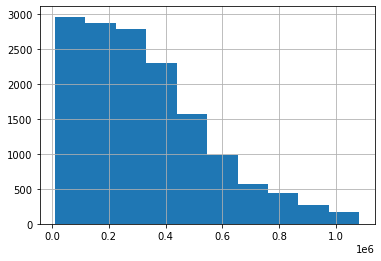

In [17]:
tax37.tax_value.hist()

<AxesSubplot:>

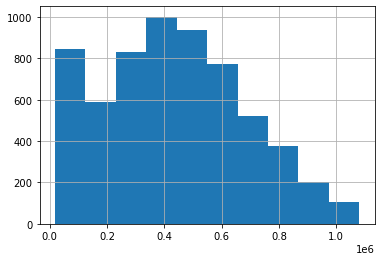

In [18]:
tax59.tax_value.hist()

<AxesSubplot:>

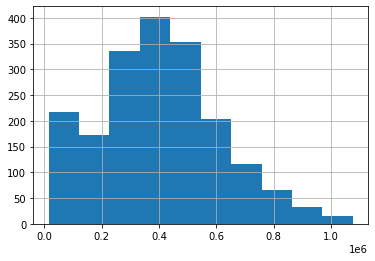

In [19]:
tax11.tax_value.hist()

In [20]:
# The isolated tax_value by fips is relatively normally distributed and all have > 30 datapoints
# They are also independent samples

In [21]:
tax37.tax_value.var()

51159616605.04398

In [22]:
tax59.tax_value.var()

59797182835.64682

In [23]:
tax11.tax_value.var()

43825974363.11124

In [24]:
# They do not have equal variances.

In [25]:
from scipy.stats import f_oneway

In [26]:
# The variances are relatively close enough, and with the number of data points we will move forward with the 
# ANOVA test.

In [27]:
# H0: Tax value means of the three fips locations are all equal.
# HA: Tax value means of the three fips locations are not equal.

In [28]:
f, p = f_oneway(tax37.tax_value, tax59.tax_value, tax11.tax_value)

In [29]:
f, p

(505.1021708473711, 2.0616311242234306e-215)

In [ ]:
# Since p-value is below our established alpha, we can reject the null hypothesis. Concluding that the three
# tax value means are not equal. 

In [ ]:
# Let's go back and take a harder look at the interaction between age and tax value.

In [ ]:
for col in conts:
    sns.relplot(y='tax_value', x=col, data=train, kind='line').set(title=(f'Tax Value by {col}'))
    plt.show()

In [ ]:
conts

In [4]:
train.head()

NameError: name 'train' is not defined

In [14]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


In [15]:
train.head()

,bedrooms,bathrooms,house_area,lot_area,tax_value,age,fips_06037,fips_06059,fips_06111
32986,0.333333,0.333333,0.298669,0.500267,411175.0,0.137681,1,0,0
41481,0.666667,0.666667,0.590839,0.588251,181755.0,0.195652,1,0,0
20796,0.333333,0.333333,0.476323,0.377162,286479.0,0.652174,1,0,0
14822,0.666667,0.333333,0.319406,0.446425,424302.0,0.391304,0,0,1
24148,0.333333,0.500000,0.661405,0.536103,610000.0,0.086957,0,0,1


In [16]:
# Separate our x and y variables
x_train = train.drop(columns='tax_value')
y_train = train.tax_value
x_validate = validate.drop(columns='tax_value')
y_validate = validate.tax_value
x_test = test.drop(columns='tax_value')
y_test = test.tax_value

(array([4082., 3630., 3960., 3642., 2922., 1916., 1271.,  803.,  497.,
         298.]),
 array([  13199. ,  120105.1,  227011.2,  333917.3,  440823.4,  547729.5,
         654635.6,  761541.7,  868447.8,  975353.9, 1082260. ]),
 <BarContainer object of 10 artists>)

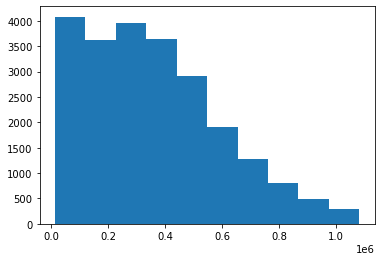

In [19]:
plt.hist(y_train)

In [21]:
# Establish our baseline

# Make our train and validate target variable dataframes
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [22]:
# Figure out if mean or median is the better baseline

In [23]:
# Creation of mean 
pred_mean = y_train['tax_value'].mean()

In [25]:
y_train['pred_mean'] = pred_mean
y_validate['pred_mean'] = pred_mean

In [26]:
# Creation of median
pred_median = y_train['tax_value'].median()
y_train['pred_median'] = pred_median
y_validate['pred_median'] = pred_median

In [28]:
# RMSE for mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.pred_mean)**(1/2)

print("RMSE using Mean\nTrain: ", round(rmse_train, 2),
     "\nValidate: ", round(rmse_validate, 2))

RMSE using Mean
Train:  234493.74 
Validate:  234759.18


In [29]:
# RMSE for median
rmse_train = mean_squared_error(y_train.tax_value, y_train.pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.pred_median)**(1/2)

print("RMSE using Median\nTrain: ", round(rmse_train, 2),
     "\nValidate: ", round(rmse_validate, 2))

RMSE using Median
Train:  236773.34 
Validate:  236999.41


In [30]:
# From the above we can determine that the mean is a slightly better baseline than the median and what will be used.

In [85]:
## Tried to do the visualization of actual v prediction but it would not plot correctly. Kept
# only showing the actual histogram and not the mean or median.

In [50]:
# Using a LinearRegression model
lm = LinearRegression(normalize=True)
lm.fit(x_train, y_train.tax_value)

LinearRegression(normalize=True)

In [51]:
y_train['tax_lm_pred'] = lm.predict(x_train)

In [52]:
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_lm_pred)**(1/2)

In [53]:
y_validate['tax_lm_pred'] = lm.predict(x_validate)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_lm_pred)**(1/2)

In [54]:
print("RMSE for OLS using LinearRegression\nTraining: ", rmse_train,
     "\nValidation: ", rmse_validate)

RMSE for OLS using LinearRegression
Training:  207625.89764579825 
Validation:  208581.2996661802


In [55]:
# Using LassoLars model
lars = LassoLars(alpha=1.0)
lars.fit(x_train, y_train.tax_value)

LassoLars()

In [56]:
y_train['tax_pred_lars'] = lars.predict(x_train)

In [57]:
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_pred_lars)**(1/2)

In [58]:
y_validate['tax_pred_lars'] = lars.predict(x_validate)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_pred_lars)**(1/2)

In [59]:
print("RMSE for Lasso + Lars\nTraining: ", rmse_train,
     "\nValidation: ", rmse_validate)

RMSE for Lasso + Lars
Training:  207625.88775115635 
Validation:  208579.76513098396


In [60]:
# TweedieRegressor (GLM)
glm = TweedieRegressor(power=1, alpha=0)

In [61]:
glm.fit(x_train, y_train.tax_value)

TweedieRegressor(alpha=0, power=1)

In [62]:
y_train['tax_pred_glm'] = glm.predict(x_train)
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_pred_glm)**(1/2)

In [63]:
y_validate['tax_pred_glm'] = glm.predict(x_validate)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_pred_glm)**(1/2)

In [64]:
print("RMSE using Tweedie, power=1 & alpha=0\nTraining: ", rmse_train,
     "\nValidation: ", rmse_validate)

RMSE using Tweedie, power=1 & alpha=0
Training:  207343.86218540202 
Validation:  208494.07592517268


In [65]:
# Polynomial Features
pf = PolynomialFeatures(degree=2)
x_train_degree2 = pf.fit_transform(x_train)
x_validate_degree2 = pf.transform(x_validate)
x_test_degree2 = pf.transform(x_test)

In [66]:
# LinearRegression with 2 degrees
lm2 = LinearRegression(normalize=True)
lm2.fit(x_train_degree2, y_train.tax_value)

LinearRegression(normalize=True)

In [67]:
y_train['tax_pred_lm2'] = lm2.predict(x_train_degree2)

In [69]:
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_pred_lm2)**(1/2)

In [70]:
y_validate['tax_pred_lm2'] = lm2.predict(x_validate_degree2)

In [71]:
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_pred_lm2)

In [72]:
print("RMSE for Polynomial Model, with two degrees\nTraining: ", rmse_train,
     "\nValidation: ", rmse_validate)

RMSE for Polynomial Model, with two degrees
Training:  203447.34654171954 
Validation:  41611289058.986626


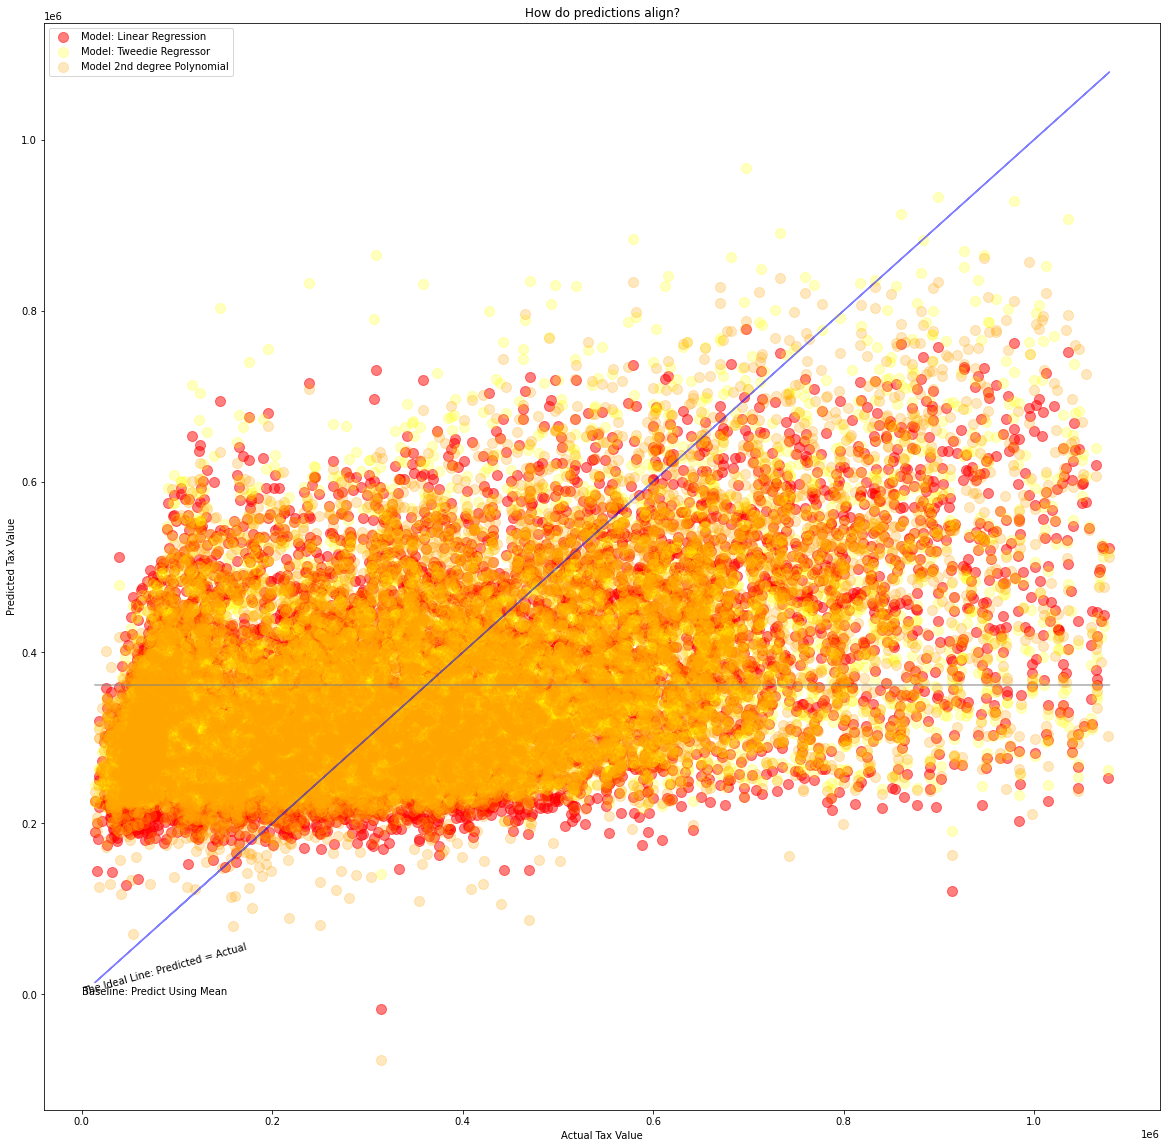

In [84]:
# Plotting actual v predicted values
plt.figure(figsize=(20,20))
plt.plot(y_validate.tax_value, y_validate.pred_mean, alpha=.5, color="gray", label="_nolegend_")
plt.annotate("Baseline: Predict Using Mean", (10,10))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color='blue', label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.tax_lm_pred, alpha=.5, color='red', s=100, label='Model: Linear Regression')
plt.scatter(y_validate.tax_value, y_validate.tax_pred_glm, alpha=.25, color='yellow', s=100, label='Model: Tweedie Regressor')
plt.scatter(y_validate.tax_value, y_validate.tax_pred_lm2, alpha=.25, color='orange', s=100, label='Model 2nd degree Polynomial')

plt.legend()
plt.xlabel('Actual Tax Value')
plt.ylabel('Predicted Tax Value')
plt.title('How do predictions align?')
plt.show()

# Unsure why baseline annotation will not move

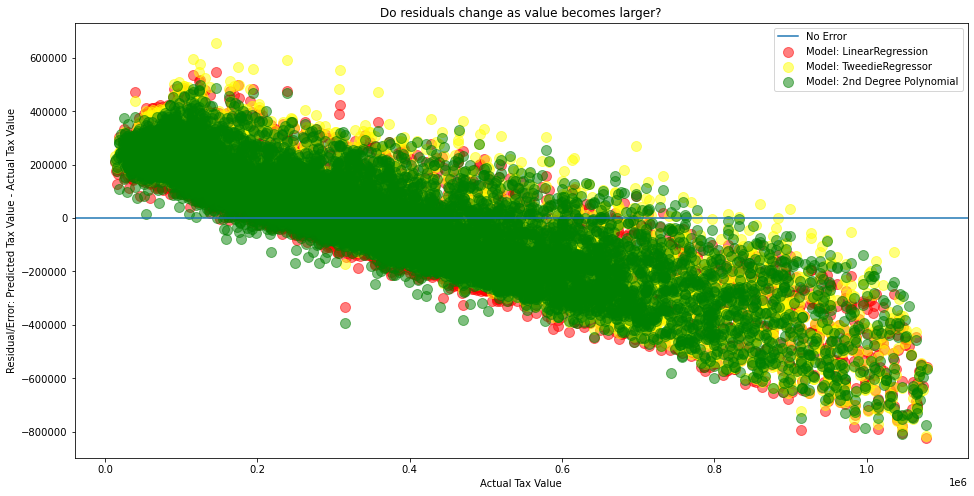

In [86]:
# Residual Plots: Plotting the Errors in Predictions
plt.figure(figsize=(16,8))
plt.axhline(label='No Error')
plt.scatter(y_validate.tax_value, y_validate.tax_lm_pred - y_validate.tax_value,
            alpha=.5, color='red', s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_glm - y_validate.tax_value,
           alpha=.5, color='yellow', s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.tax_pred_lm2 - y_validate.tax_value,
            alpha=.5, color='green', s=100, label="Model: 2nd Degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Residual/Error: Predicted Tax Value - Actual Tax Value")
plt.title("Do residuals change as value becomes larger?")
plt.show()

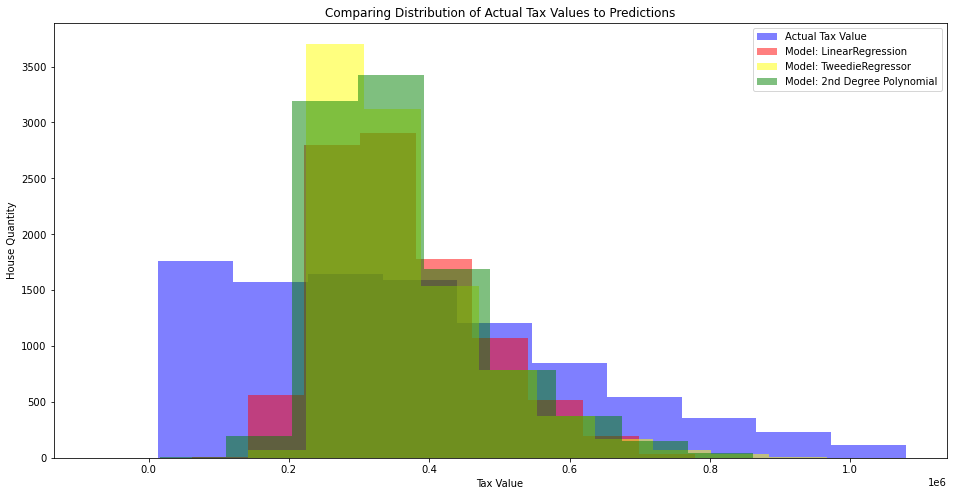

In [87]:
# Histograms
plt.figure(figsize=(16,8))
plt.hist(y_validate.tax_value, color='blue', alpha=.5, label='Actual Tax Value')
plt.hist(y_validate.tax_lm_pred, color='red', alpha=.5, label='Model: LinearRegression')
plt.hist(y_validate.tax_pred_glm, color='yellow', alpha=.5, label='Model: TweedieRegressor')
plt.hist(y_validate.tax_pred_lm2, color='green', alpha=.5, label='Model: 2nd Degree Polynomial')
plt.xlabel('Tax Value')
plt.ylabel('House Quantity')
plt.title('Comparing Distribution of Actual Tax Values to Predictions')
plt.legend()
plt.show()

In [88]:
### Selection of best will be used on test, currently that looks like the 2nd Degree Polynomial. Would like to 
# continue to test models before deciding on the best one